In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *
from dvclive import Live  # type: ignore
from dvclive.lightning import DVCLiveLogger  # type: ignore

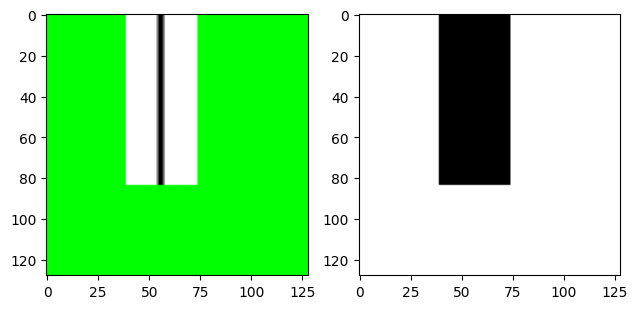

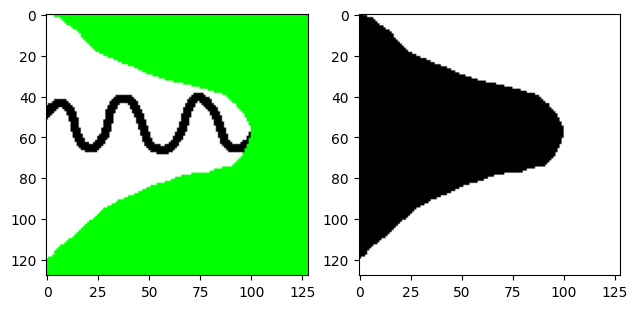

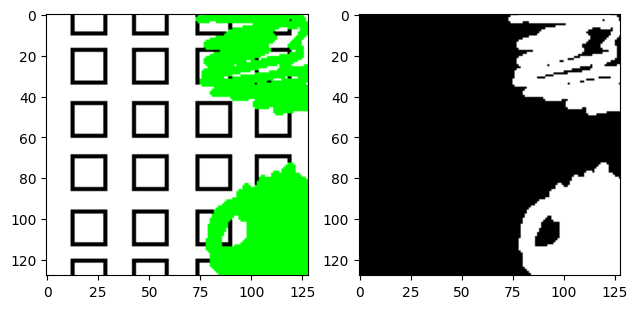

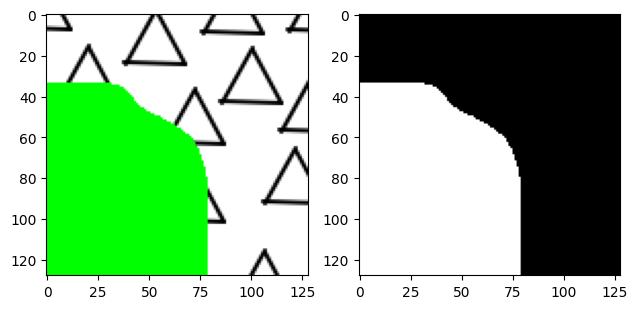

In [3]:
from data import PointDataset

store = PointDataset(id_bits=8)
store.load("img/vertical.png")
store.load("img/sine.png")
store.load("img/squares.png")
store.load("img/triangles.png")
store.plot(0)
store.plot(1)
store.plot(2)
store.plot(3)

In [13]:
dl = t.utils.data.DataLoader(store, batch_size=64, shuffle=True, num_workers=4)
val_d = t.utils.data.DataLoader(store, batch_size=128, shuffle=False, num_workers=4)

In [12]:
from models import ResMLP, BiResMLP, PointModel

model = PointModel(
    store=store,
    model_type="ResMLP",
    input_size=43,
    hidden_size=64,
    output_size=3,
    n_layers=10,
)
trainer = pl.Trainer(
    logger=DVCLiveLogger(
        log_model=True,
        # run_name="",
    ),
    check_val_every_n_epoch=5,
    max_epochs=100,
)
trainer.fit(model, train_dataloaders=dl, val_dataloaders=val_dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mike/.local/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/mike/Desktop/Vermicelli/deep/DvcLiveLogger/dvclive_run/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name  | Type   | Params
---------------------------------
0 | model | ResMLP | 44.6 K
---------------------------------
44.6 K    Trainable params
0         Non-trainable params
44.6 K    Total params
0.178     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/mike/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:478: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/home/mike/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
	deep/.dvcignore, deep/.dvc/config, deep/.dvc/.gitignore, deep/DvcLiveLogger/dvclive_run/checkpoints.dvc, deep/DvcLiveLogger/dvclive_run/.gitignore


InvalidDataTypeError: Data 'predictions' has not supported type <class 'torch.Tensor'>

Add proper logging, save models to DVC, etc.

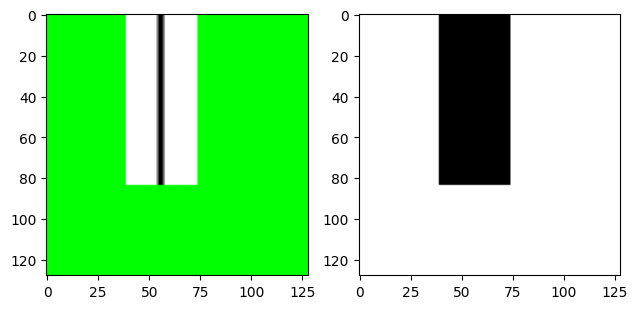

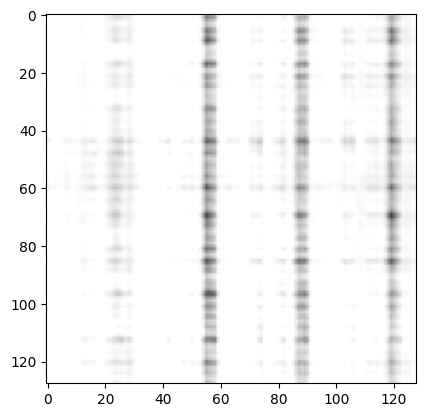

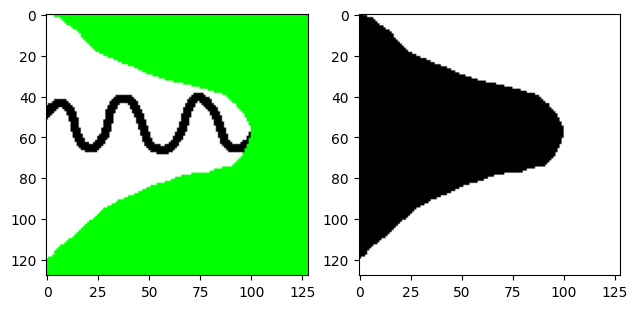

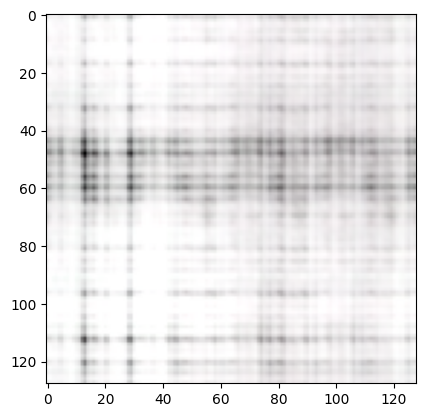

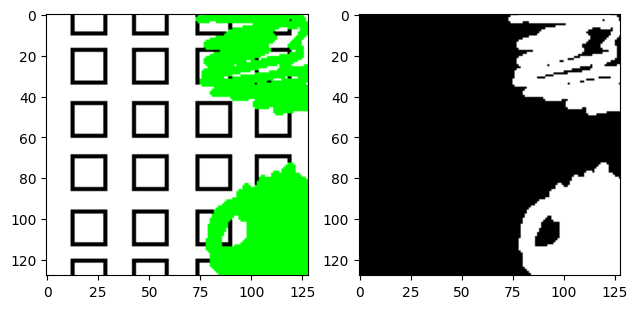

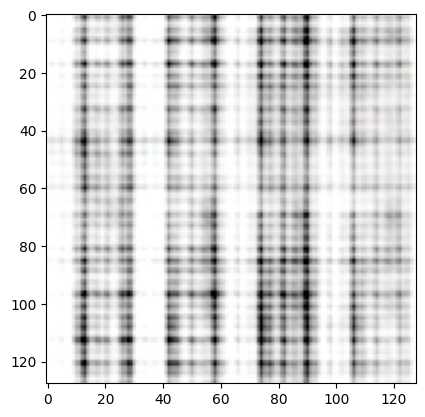

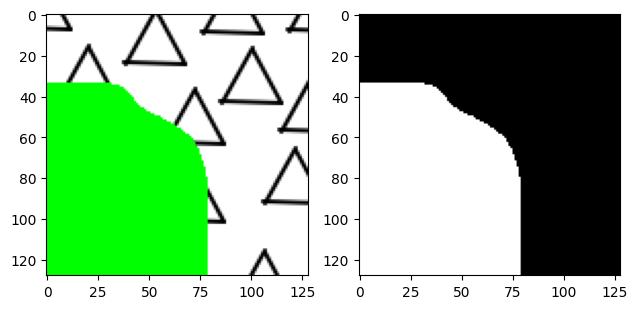

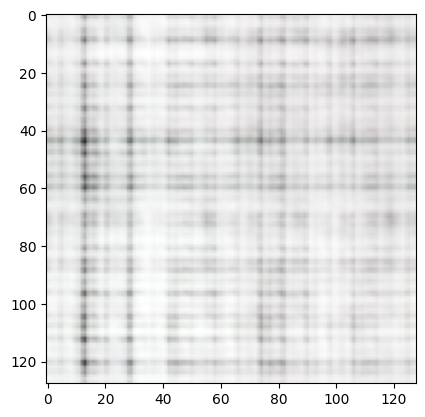

In [9]:
model.on_validation_epoch_start()
for i in range(4):
    store.plot(i)
    store.predictions(model, i)